# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [ ]:
!pip install missingno

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt

In [2]:
demo_df = pd.read_csv('demo01.csv')

In [3]:
demo_df.sample(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
391,M,Y,Y,0,Working,Higher education,Married,House / apartment,54.679452,20.452055,1,0,0,0,2.0,False
12367,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.358904,6.531507,1,0,0,1,2.0,False
1780,M,Y,N,1,Working,Secondary / secondary special,Married,House / apartment,28.112329,0.643836,1,0,1,0,3.0,False
13997,F,N,Y,0,State servant,Higher education,Separated,House / apartment,50.589041,5.287671,1,1,0,0,1.0,False
2137,M,Y,N,0,Working,Secondary / secondary special,Married,House / apartment,36.742466,0.506849,1,0,0,0,2.0,False


In [4]:
l = demo_df.shape[0]
c = demo_df.shape[1]

print(f'O DataFrame demo_df possui {l} linhas e {c} colunas')

O DataFrame demo_df possui 16650 linhas e 16 colunas


In [5]:
demo_df.drop_duplicates(inplace=True)
demo_df.shape

(6770, 16)

In [6]:
ld = demo_df.shape[0]
cd = demo_df.shape[1]

print(f'Após o uso do drop_duplicates o DataFrame demo_df passou a ter {ld} linhas e {cd} colunas')
print(f'Foram eliinadas {l - ld} linhas duplicadas')

Após o uso do drop_duplicates o DataFrame demo_df passou a ter 6770 linhas e 16 colunas
Foram eliinadas 9880 linhas duplicadas


In [7]:
#variáveis

vars = []
print(f'Essa base de dados é composta pelas seguintes variáveis: ')
for c in demo_df.columns:
    vars.append(c)
for k, v in enumerate(vars):
    print(f'{k+1} -> {v.title()}')

Essa base de dados é composta pelas seguintes variáveis: 
1 -> Sexo
2 -> Posse_De_Veiculo
3 -> Posse_De_Imovel
4 -> Qtd_Filhos
5 -> Tipo_Renda
6 -> Educacao
7 -> Estado_Civil
8 -> Tipo_Residencia
9 -> Idade
10 -> Tempo_Emprego
11 -> Possui_Celular
12 -> Possui_Fone_Comercial
13 -> Possui_Fone
14 -> Possui_Email
15 -> Qt_Pessoas_Residencia
16 -> Mau


In [8]:
#Tipos de dados de cada variável
print(demo_df.dtypes)
o = 0
i = 0
f = 0
b = 0
for coluna in demo_df.columns:
    if demo_df[coluna].dtype == 'object':
        o+=1
    if demo_df[coluna].dtype == 'int64':
        i+=1
    if demo_df[coluna].dtype == 'float64':
        f+=1
    if demo_df[coluna].dtype == 'bool':
        b+=1
        
print(f'\n\nA frequência para os tido de dados é: \
    \n{(o/len(demo_df.columns))*100}% são Object\
    \n{(i/len(demo_df.columns))*100}% são Int64\
    \n{(f/len(demo_df.columns))*100}% são Float64\
    \n{(b/len(demo_df.columns))*100}% são Bool')

print('\nNeste caso será necessários transformar os dados para que fique 100 % númerico')

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


A frequência para os tido de dados é:     
43.75% são Object    
31.25% são Int64    
18.75% são Float64    
6.25% são Bool

Neste caso será necessários transformar os dados para que fique 100 % númerico


In [9]:
# dados aunsentes
print(demo_df.isna().sum())

print(f'\nObserva-se que não há dados ausentes.')

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Observa-se que não há dados ausentes.


<AxesSubplot:>

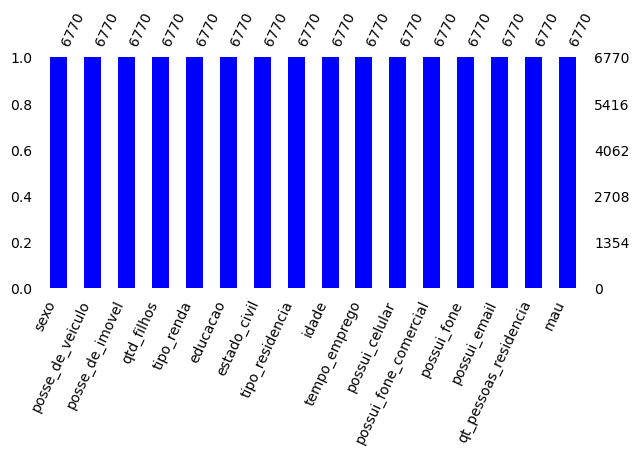

In [10]:
msno.bar(demo_df,figsize=(7,3),
    fontsize=10,
    label_rotation=65,
    color='blue',
    sort='ascending')

O Gráfico acima mostra que todos as variáveis possuem a mesma quantidade de dados


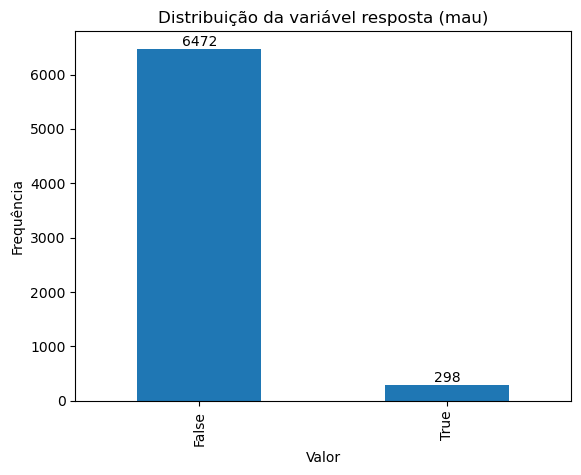

In [11]:
#Distribuição da variável resposta (mau)

freq_mau = demo_df['mau'].value_counts()
freq_mau.plot.bar()

# configurando as legendas dos eixos x e y
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title("Distribuição da variável resposta (mau)")

# exibindo os valores acima de cada barra
for i in freq_mau.index:
    plt.text(i, freq_mau[i], freq_mau[i], ha='center', va='bottom')

plt.show()



In [12]:
print('O histograma acima mostra a distribuição da variável mau, segue abaixo os valores correspondente a True e False')
for i in freq_mau.index:
    print(i, freq_mau[i])


O histograma acima mostra a distribuição da variável mau, segue abaixo os valores correspondente a True e False
False 6472
True 298


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [13]:
#1 Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
n_var = pd.DataFrame(pd.Series(dict(demo_df.dtypes)))
n_var = n_var.reset_index() # Resetando os índices e transformado-as em coluna
n_var.columns=('Variáveis','Tipos') # renomeando as colunas

n_var

,Variáveis,Tipos
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [14]:
#2 Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável

#fazendo um loop para percorrer todas as colunas e retirar os valores únicos
nova_coluna = []
for i in demo_df.columns:
  nova_coluna.append(len(pd.unique(demo_df[i])))

#Criando uma nova coluna
n_var['Qtd_categorias'] = nova_coluna

#imprimindo o DataFrame n_var
n_var

,Variáveis,Tipos,Qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [15]:
demo_df.sexo = demo_df.sexo.map({'F': 1, 'M': 0})
demo_df.posse_de_veiculo = demo_df.posse_de_veiculo.map({'Y': 1, 'N': 0})
demo_df.posse_de_imovel = demo_df.posse_de_imovel.map({'Y': 1, 'N': 0})
demo_df.mau = demo_df.mau.astype(int)

demo_df.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0
1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0
3,0,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,0
4,1,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,0
6,1,0,1,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,0


In [16]:
df_dummies = pd.get_dummies(demo_df[['tipo_renda','educacao','estado_civil','tipo_residencia']])

# Adiciona as colunas dummies ao dataframe original
demo_df = pd.concat([demo_df, df_dummies], axis=1)

# Remove a coluna original 'educacao'
demo_df = demo_df.drop(columns=['tipo_renda','educacao','estado_civil','tipo_residencia'])

# Imprime o resultado
demo_df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,1,0,1,0,27.482192,4.024658,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,1,0,1,1,34.857534,3.101370,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
print('Tipos de dados de cada variável após transformação')
print(demo_df.dtypes)
o = 0
i = 0
f = 0
b = 0
for coluna in demo_df.columns:
    if demo_df[coluna].dtype == 'object':
        o+=1
    if demo_df[coluna].dtype == 'int64':
        i+=1
    if demo_df[coluna].dtype == 'float64':
        f+=1
    if demo_df[coluna].dtype == 'bool':
        b+=1
        
print(f'\n\nA frequência para os tido de dados é: \
    \n{(o/len(demo_df.columns))*100}% são Object\
    \n{(i/len(demo_df.columns))*100}% são Int64\
    \n{(f/len(demo_df.columns))*100}% são Float64\
    \n{(b/len(demo_df.columns))*100}% são Bool')

print('\nApós a transformação todos os dados são 100 % númerico')

Tipos de dados de cada variável após transformação
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
tipo_renda_Commercial associate             uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Academic degree                    uint8
educacao_Higher education                   uint8

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [18]:
demo_df[['mau','posse_de_veiculo','possui_email']].groupby(['mau']).mean()

,posse_de_veiculo,possui_email
mau,,
0,0.378708,0.084209
1,0.362416,0.067114


Podemos ver que a categoria posse_de_veículo tem a proporção mais alta de casos que possuem um carro (0.36), quando comparado com possui_email (0.06). Isso sugere que a categoria de posse_de_veículo está mais fortemente associada com a a resposta mau.


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [19]:
 demo_df.to_csv('demo01_tratado.csv')